In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPool2D

In [ ]:
train_dir='/content/drive/MyDrive/Vegetable_Images/train'
val_dir='/content/drive/MyDrive/Vegetable_Images/validation'
test_dir='/content/drive/MyDrive/Vegetable_Images/test'

In [ ]:
img_height = 224
img_width = 224
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=1)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [ ]:
resnet_model = ResNet50(include_top=False,weights="imagenet")
x = resnet_model.output
x = GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024,activation='relu')(x)
x = tf.keras.layers.Dense(512,activation='relu')(x)
res = tf.keras.layers.Dense(15, activation="softmax")(x)

# generate our model
model = Model(inputs=resnet_model.input, outputs=res)
# model.summary()


94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
# will not retrain weights
for layer in resnet_model.layers:
    layer.trainable = False

model.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005),
    loss = tf.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy'])

hist = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 5,
    steps_per_epoch = len(train_ds),
    validation_steps = len(val_ds))

model.save(r"/content/drive/MyDrive/Vegetable_Images/model")

Epoch 1/5
421/469 [=========================>....] - ETA: 4:31 - loss: 0.3588 - accuracy: 0.9351

In [ ]:
model.evaluate(test_ds)

3000/3000 [==============================] - 355s 118ms/step - loss: 0.0172 - accuracy: 0.9983


[0.01719893328845501, 0.9983333349227905]

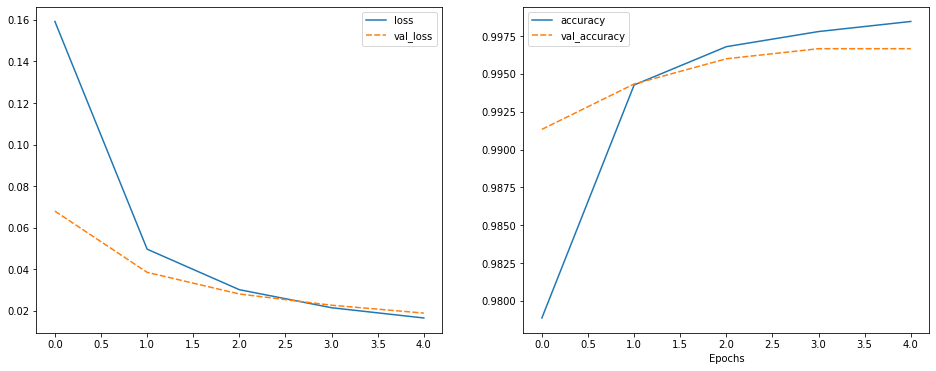

In [ ]:
import seaborn as sns
def plot_history(history):
  fig,ax = plt.subplots(1,2,figsize=(16,6))
  history_data = pd.DataFrame(history.history)
  sns.lineplot(data=history_data[['loss','val_loss']],ax=ax[0])
  sns.lineplot(data=history_data[['accuracy','val_accuracy']],ax=ax[1])
  plt.xlabel('Epochs');
    
plot_history(hist)

In [ ]:
len(train_ds)

469

In [ ]:
next(iter(train_ds))[1].shape

TensorShape([32])